
## Data Analytics in Health Care and Connected Care/Health Information Systems
 *Practical Session III: Data Analytics in Healthcare and Connected Care/Health  Information Systems - working with data from wearable devices*

---
---
The aims of this practical session are: (a) to make explore and analyze in details data derived from a consumer wearable device; (b) understand what is ambient intelligence and its main properties. One of the group members must submit the completed notebook of the second practical session in Canvas by March 27th, 23:59:59 (GMT+1).

---


---

*Lecturer/s: Bart Jansen (bjansen@etrovub.be),  Jef Vandemeulebroucke (jefvdmb@etrovub.be), Nikolaos Deligiannis (ndeligia@etrovub.be)*

*Teaching assistant/s: Joris Wuts(jwuts@etrovub.be), Jasabanta Patro (jpatro@etrovub.be), Redona Brahimetaj (rbrahime@etrovub.be)*




In [ ]:
student1_full_name = str(input('Enter your full name: '))
student1_id = int(input('Enter your student ID: '))
student2_full_name = str(input('Enter your full name: '))
student2_id = int(input('Enter your student ID: '))

Enter your full name: Sajjad Mahmoudi
Enter your student ID: 573106
Enter your full name: Somayyeh Gholami
Enter your student ID: 562113


---
---
#Data Description
---

---


> The data you will be using during this lab session are collected via Apple Watch wearable device as well as labeled sleep scored from gold-standard polysomnography. Data were collected from 31 subjects in total at the University of Michigan from June 2017 to March 2019. Subjects wore an Apple Watch for 7 - 14 days to collect their ambulatory steps. On the last day, they spent the night in the lab for an eight hour sleep opportunity, and acceleration and heart rate from their Apple Watch while they slept were recorded. If any of you have any interest to see sample code on how to access these sensors on the Apple Watch, can find it [here](https://github.com/ojwalch/sleep_accel). The following types of data are provided:

*   **motion (acceleration):**  date (in seconds since PSG start), x acceleration (in g), y acceleration, z acceleration.
*   **heart rate (bpm):** date(in seconds since PSG start), heart rate (bpm)
*   **steps (count):** date (in seconds since PSG start), steps (total in bin from this timestamp to next timestamp)
*   **labeled sleep:** date (in seconds since PSG start), stage (0-5, wake = 0, N1 = 1, N2 = 2, N3 = 3, REM = 5)

For your information, apple watch uses a triaxial MEMS accelerometer that measures acceleration in the x, y, and z directions, in units of g (9.8 m/s2). Heart rate is measured with  photoplethysmography (PPG) (an optical technique that measures blood volume changes) on the dorsal aspect of the wrist. Raw acceleration signal and heart rate data are obtained from the device by creating a “Workout Session” and using functions built-in to the iOS WatchKit and HealthKit frameworks. For more detailed information/description of the dataset, please refer [here](https://academic.oup.com/sleep/article/42/12/zsz180/5549536).


---
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##Downloading and Preparing the Data


* To use the data, you should click [here](https://drive.google.com/drive/folders/19DAPxpjTlXy3ZEJpO05BiG7O4CxiTjEU), click on the folder named 'cropped' and then click on 'Add shortcut to Drive'. Select the folder you want to add a shortcut to (to avoid having issues with folder paths, we suggest you add the file to 'My Drive' drectory). After doing so, run the two lines of code below.

*  The data we have shared, consists of multiple files ('cleaned_counts', 'cleaned_hr', 'cleaned_motion', 'cleaned_psg') per subject. As a first task, you need to read all these files and create a dataframe: rows -> all the subject IDs; columns -> all the saved values we have for all the types of data provided.


Keywords: [list files in a directory](https://docs.python.org/3/library/os.html#os.listdir), [list subject IDs](https://docs.python.org/3/library/re.html#re.findall), [list unique values fom a list](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [ ]:
import shutil, os, re, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
shutil.copytree('/content/drive/MyDrive/Health Information System/3/cropped', '/content/cropped')

'/content/cropped'

In [ ]:
## -- PART 0 -- ##
#create the dataframe with all subjects ids and their corresponding types of data (the headings should look like below)
#the headings should look like: Subject ID |  Motion |  Heart Rate |  Steps | Sleep labels
files = os.listdir(path='/content/cropped')
files

['1449548_cleaned_motion.out',
 '8258170_cleaned_motion.out',
 '5498603_cleaned_motion.out',
 '4018081_cleaned_psg.out',
 '8686948_cleaned_motion.out',
 '3997827_cleaned_counts.out',
 '1818471_cleaned_psg.out',
 '1360686_cleaned_counts.out',
 '5132496_cleaned_counts.out',
 '2638030_cleaned_psg.out',
 '7749105_cleaned_motion.out',
 '6220552_cleaned_psg.out',
 '4314139_cleaned_hr.out',
 '759667_cleaned_motion.out',
 '5383425_cleaned_motion.out',
 '5132496_cleaned_psg.out',
 '8692923_cleaned_psg.out',
 '3509524_cleaned_hr.out',
 '9106476_cleaned_psg.out',
 '46343_cleaned_motion.out',
 '8173033_cleaned_counts.out',
 '8173033_cleaned_psg.out',
 '4426783_cleaned_psg.out',
 '4314139_cleaned_motion.out',
 '1818471_cleaned_motion.out',
 '46343_cleaned_counts.out',
 '46343_cleaned_psg.out',
 '4314139_cleaned_psg.out',
 '9618981_cleaned_hr.out',
 '2638030_cleaned_hr.out',
 '4426783_cleaned_hr.out',
 '7749105_cleaned_counts.out',
 '3997827_cleaned_motion.out',
 '8530312_cleaned_hr.out',
 '9106476_

In [ ]:
allSubjectId_list = []
for ele in files:  
   allSubjectId_list.append(re.findall('[0-9]+', ele))
uniqueSubjectId_list = np.unique(allSubjectId_list)
uniqueSubjectId_df = pd.DataFrame(uniqueSubjectId_list)
uniqueSubjectId_df

,0
0,1066528
1,1360686
2,1449548
3,1455390
4,1818471
5,2598705
6,2638030
7,3509524
8,3997827
9,4018081


In [ ]:
def dotOutFile_to_nestedlist(file_name):
  path = '/content/drive/MyDrive/Health Information System/3/cropped/' + file_name
  openFile = open(path, 'r')
  readFile = openFile.read()
  file_list = readFile.split('\n')
  if 'counts' in file_name:     # replacing the commas in "counts" files with space 
    file_list = list(map(lambda x: x.replace(',', ' '),file_list))
  return [list(map(float, ele.strip().split())) for ele in file_list]

In [ ]:
subjectFiles_list = []
for subject in uniqueSubjectId_list:
  subjectFiles_list.append([int(subject)])

for i in range(len(uniqueSubjectId_list)):
  for j in range(len(files)):
    if re.search(uniqueSubjectId_list[i], files[j]):
      subjectFiles_list[i].append(files[j])

for i in range(len(subjectFiles_list)):
  for j in range(1,5):
    subjectFiles_list[i][j] = dotOutFile_to_nestedlist(subjectFiles_list[i][j])

In [ ]:
subjectFiles_df = pd.DataFrame(subjectFiles_list, columns=['SubjectID', 'Motion', 'HeartRate', 'LabeldSleep', 'Steps'])
subjectFiles_df

,SubjectID,Motion,HeartRate,LabeldSleep,Steps
0,1066528,"[[0.015948, 0.403931, 0.449005, -0.79686], [0....","[[6.38561, 52.0], [9.38561, 52.0], [13.38564, ...","[[0.0, 0.0], [30.0, 0.0], [60.0, 0.0], [90.0, ...","[[0.015948, 0.0], [15.031397, 0.0], [30.046846..."
1,1360686,"[[1255.053419, 0.0], [1270.064205, 42.98], [12...","[[0.0, -1.0], [30.0, -1.0], [60.0, -1.0], [90....","[[1.75728, 77.0], [4.75728, 77.0], [7.75731, 7...","[[1255.053419, 0.019989, -0.338638, -0.943909]..."
2,1449548,"[[0.00877, 0.960754, -0.128326, -0.385315], [0...","[[0.00877, 248.67], [15.024332, 18.42], [30.03...","[[0.0, -1.0], [30.0, -1.0], [60.0, -1.0], [90....","[[2.50048, 77.0], [12.50048, 77.0], [17.50048,..."
3,1455390,"[[0.0, -1.0], [30.0, -1.0], [60.0, -1.0], [90....","[[0.000578, 0.045166, 0.446655, -0.88533], [0....","[[0.000578, 27.63], [15.008156, 36.84], [30.01...","[[0.35927, 87.0], [5.35927, 82.0], [7.35927, 8..."
4,1818471,"[[0.0, -1.0], [30.0, -1.0], [60.0, -1.0], [90....","[[0.012105, -0.35202, 0.013397, 0.934128], [0....","[[7.31584, 77.0], [8.31584, 77.0], [13.31587, ...","[[0.012105, 0.0], [15.027303, 0.0], [30.042502..."
5,2598705,"[[0.009841, -0.410614, -0.489319, -0.76503], [...","[[0.009841, 18.42], [15.025121, 9.21], [30.040...","[[0.0, -1.0], [30.0, -1.0], [60.0, -1.0], [90....","[[4.32629, 50.0], [8.32629, 52.0], [14.32632, ..."
6,2638030,"[[0.0, -1.0], [30.0, -1.0], [60.0, -1.0], [90....","[[3.21096, 78.0], [11.21096, 93.0], [18.21096,...","[[0.001649, 9.21], [15.009395, 0.0], [30.01714...","[[0.001649, -0.299286, -0.929459, 0.187118], [..."
7,3509524,"[[2.97271, 82.0], [6.97271, 84.0], [11.97274, ...","[[0.002704, 0.0], [15.020749, 24.56], [30.0387...","[[0.0, 0.0], [30.0, 0.0], [60.0, 0.0], [90.0, ...","[[0.002704, 0.032333, -0.457611, -0.888519], [..."
8,3997827,"[[0.00603, 15.35], [15.021403, 42.98], [30.036...","[[0.00603, -0.432892, 0.778381, 0.514816], [0....","[[2.35098, 86.0], [10.35098, 85.0], [12.35095,...","[[0.0, -1.0], [30.0, -1.0], [60.0, -1.0], [90...."
9,4018081,"[[0.0, 0.0], [30.0, 0.0], [60.0, 0.0], [90.0, ...","[[0.012934, -0.454742, 0.554108, -0.697372], [...","[[1.2045, 69.0], [5.20447, 66.0], [9.20447, 62...","[[0.012934, 0.0], [15.028649, 0.0], [30.044364..."


##Getting some visuals and understandings of the dataset

*   To get an overview of the data distribution, for each of the types of data we have, plot the amount of records we have per subject. Interpret the results. In case the amount of records stored per subject is different, list some potential reasons/opinions why they are not the same. 

*   If you would like to use this dataset for classification tasks, a crucial stepis consists on knowing the records we have per each sleep stage. Show/plot the total amount of records per sleep stage. 

*   Choose one random subject id and plot: 

     --> (a) in one graph all three acceleration axes values per  timestamp;

     --> (b) nr of steps per timestamp; 
    
     --> (c) heart rate  values per timestamp; 
    
     --> (d) sleep stages per timestamp; 
     
  For each of these graphs, interpret the results (focusing more on the abnormal behaviors observed)! 

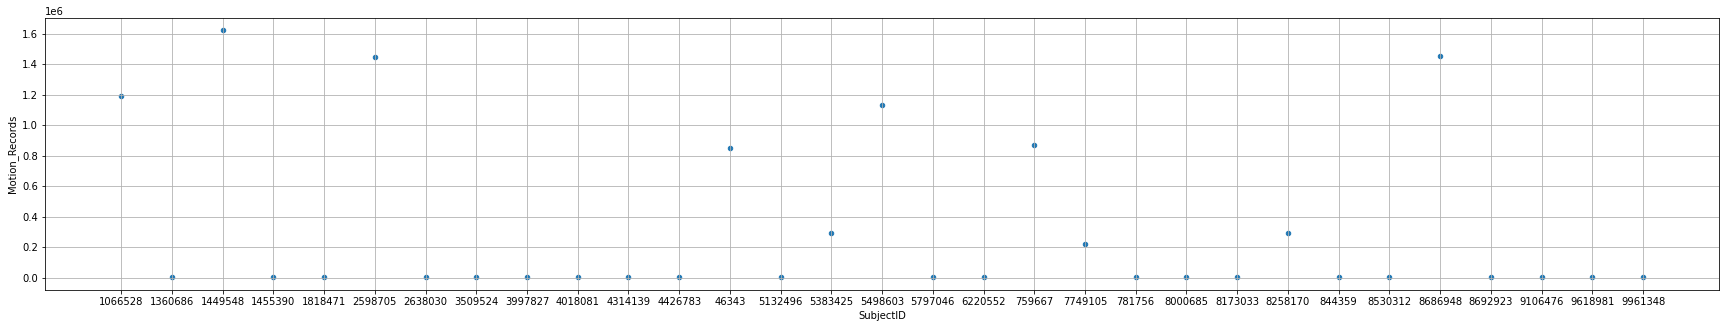

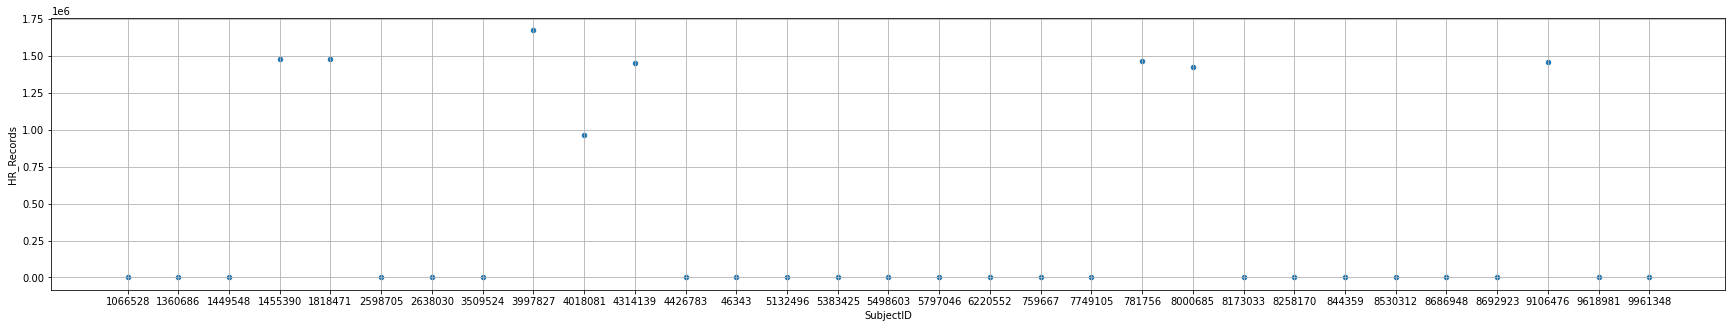

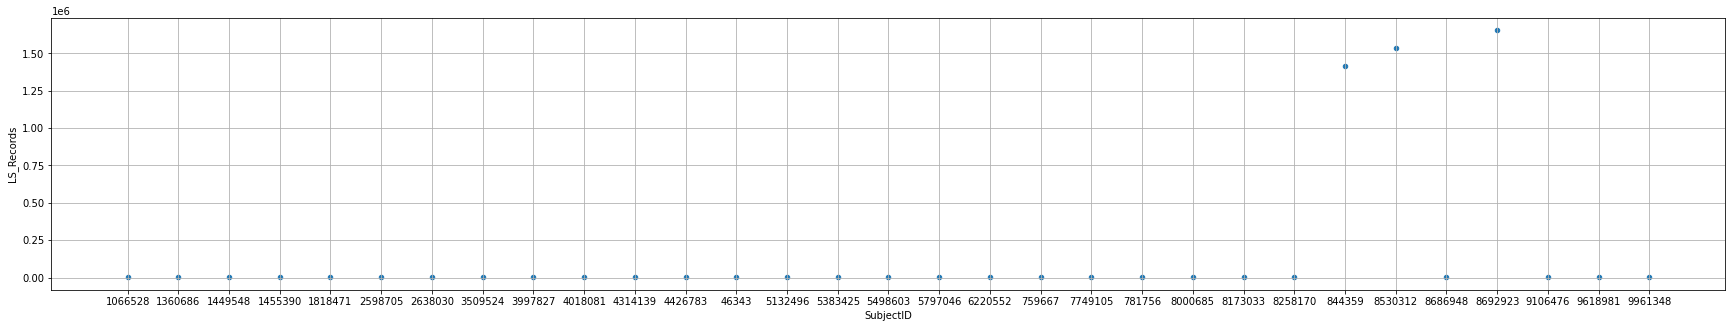

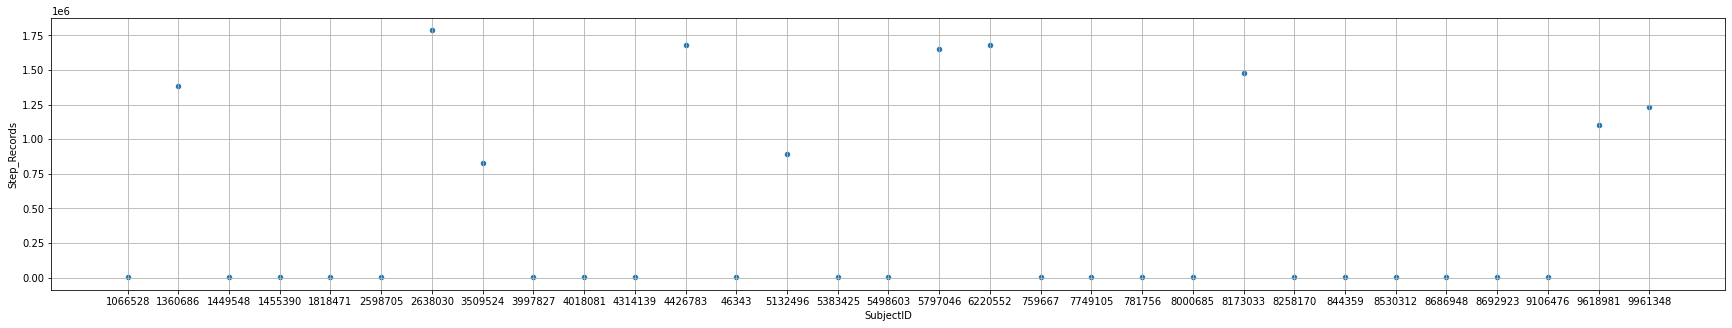

In [ ]:
## -- PART I -- ##
#plot amount of records per subject, interpret the results, list potential reasons/opinions why the amount of records recorded per subject are not the same.
df_nrOfRecords = pd.DataFrame({'SubjectID': uniqueSubjectId_list,
                'Motion_Records': subjectFiles_df.Motion.apply(lambda x: len(x)),
                'HR_Records': subjectFiles_df.HeartRate.apply(lambda x: len(x)),
                'LS_Records': subjectFiles_df.LabeldSleep.apply(lambda x: len(x)),
                'Step_Records': subjectFiles_df.Steps.apply(lambda x: len(x))})
#display(df_nrOfRecords)

df_nrOfRecords.plot(x='SubjectID', y='Motion_Records' ,figsize=(30,5), grid=True, kind='scatter')
df_nrOfRecords.plot(x='SubjectID', y='HR_Records' ,figsize=(30,5), grid=True, kind='scatter')
df_nrOfRecords.plot(x='SubjectID', y='LS_Records' ,figsize=(30,5), grid=True, kind='scatter')
df_nrOfRecords.plot(x='SubjectID', y='Step_Records' ,figsize=(30,5), grid=True, kind='scatter')

####POTENTIAL REASONS#####
#The reason why the amount of records per subject is not the same, could be for various points:
#It could be, for example, his or her apple watch didn't sense the data for a while, it could happen when its battery died, or he /she didn't wear it the whole day.


,-1,0,1,2,3,4,5
Total_No.,62,18096,366,2639,632,83,1405


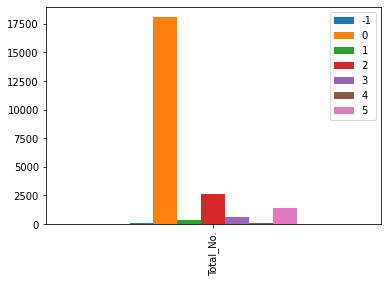

In [ ]:
## -- PART II -- ##
#show/plot the total amount of records per sleep stage (for  all subjects together
import itertools
def nrOfStage_per_eachLabel(label_number):
  total_number = 0
  for i in range(len(subjectFiles_df)):
    counter = collections.Counter(itertools.chain(*subjectFiles_df.loc[i,'LabeldSleep']))
    total_number += counter[label_number]
  return total_number

nrOfStages = {"-1": nrOfStage_per_eachLabel(-1), "0": nrOfStage_per_eachLabel(0), "1": nrOfStage_per_eachLabel(1), "2": nrOfStage_per_eachLabel(2), "3": nrOfStage_per_eachLabel(3),
              "4": nrOfStage_per_eachLabel(4), "5": nrOfStage_per_eachLabel(5)}

nrOfStages_df = pd.DataFrame(nrOfStages, index = ["Total_No."])
display(nrOfStages_df)
print()
nrOfStages_df.plot.bar()

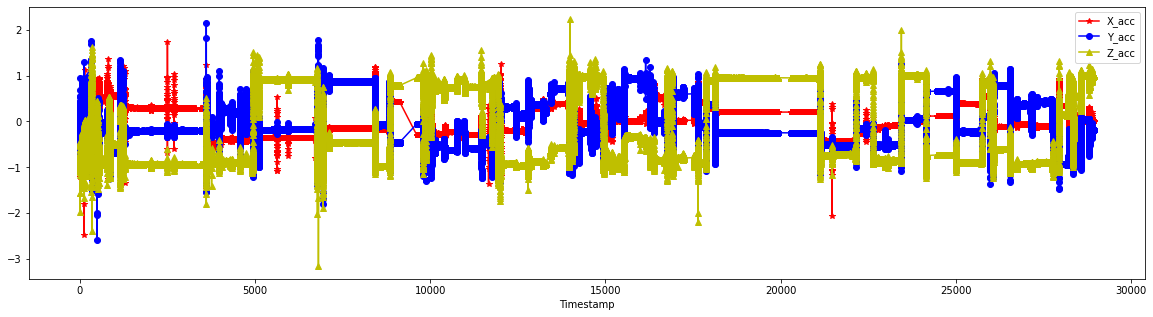

In [ ]:
## -- PART III -- ##
#using  the data collected from a  randomly chosen subject id, plot: 
## Interpret all the results carefully. Focus more on the abnormal behaviors observed.  
import random
random_subjectId = random.choice(uniqueSubjectId_list)
######   all three acceleration axes per timestamp (in one graph) ######
name_motion = str(random_subjectId) + '_cleaned_motion.out'
motion_list_forRandomSubject = dotOutFile_to_nestedlist(name_motion)
motion_df_forRandomSubject = pd.DataFrame(motion_list_forRandomSubject, columns = ['Timestamp', 'X_acc', 'Y_acc', 'Z_acc'])
motion_df_forRandomSubject.plot(x= 'Timestamp', figsize=(20,5), style=['r*-','bo-','y^-']) 
#### COMMENT #### 
#According to the plot, the normal range of hands motion' acceleration is around between -1 to 1. In the Z-axis, we have the most changes of hands motion acceleration changes.
#The most motion of hands occurred on Z-axis.

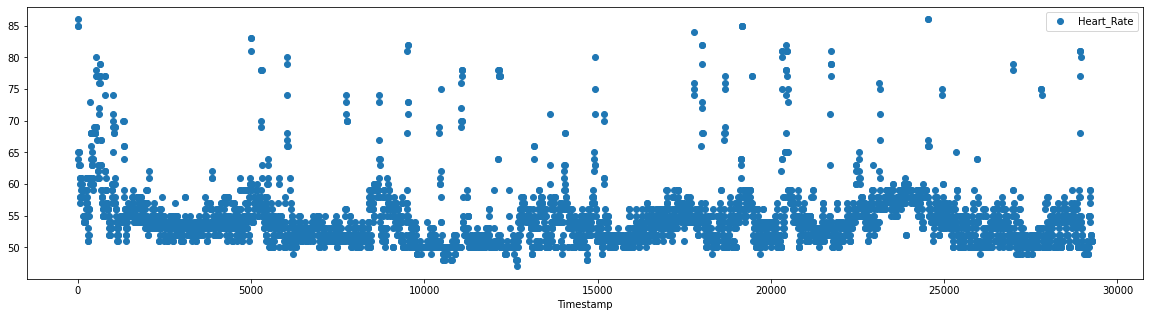

In [ ]:
######   heart rate values per timestamp ######
name_hr = str(random_subjectId) + '_cleaned_hr.out'
hr_list_forRandomSubject = dotOutFile_to_nestedlist(name_hr)
hr_df_forRandomSubject = pd.DataFrame(hr_list_forRandomSubject, columns = ['Timestamp', 'Heart_Rate'])
hr_df_forRandomSubject.plot(x= 'Timestamp', y= 'Heart_Rate', figsize=(20,5), style= 'o')
#### COMMENT #### 
# The abnormally of heartbeats during sleep time could indicate bad dreams:) we're just kidding.
#It could be a symptom of abnormally blood pressure or changing some chemical in the blood. 
#Or some people get a panic attack during sleep time which causes high heartbeats. 

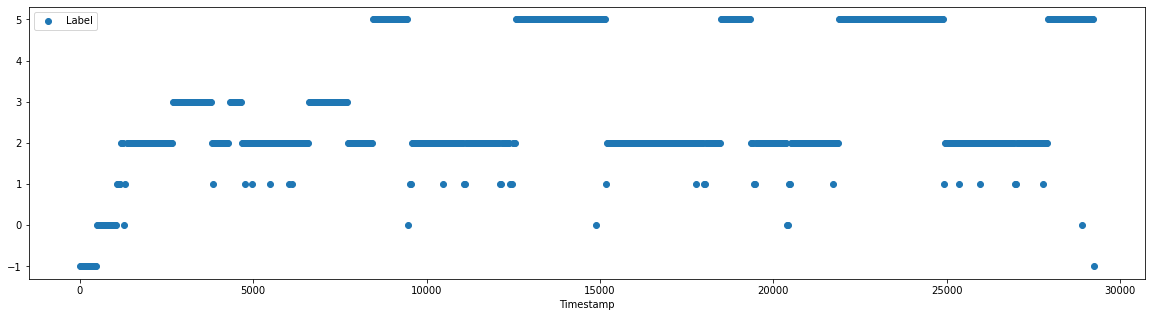

In [ ]:
##### sleep stages per timestamp ######
name_psg = str(random_subjectId) + '_cleaned_psg.out'
sleepSatge_list_forRandomSubject = dotOutFile_to_nestedlist(name_psg)
sleepSatge_df_forRandomSubject = pd.DataFrame(sleepSatge_list_forRandomSubject, columns = ['Timestamp', 'Label'])
sleepSatge_df_forRandomSubject.plot(x= 'Timestamp', y= 'Label', figsize=(20,5), style= 'o') 
#### COMMENT #### 
# The plot shows that the most of time sleeping is in stages 2 and 5.

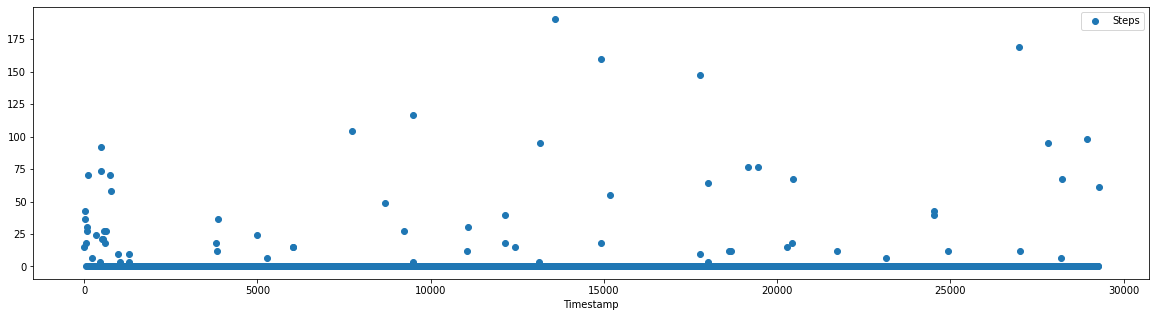

In [ ]:
###### nr of steps per timestamp ######
name_step = str(random_subjectId) + '_cleaned_counts.out'
step_list_forRandomSubject = dotOutFile_to_nestedlist(name_step)
step_df_forRandomSubject = pd.DataFrame(step_list_forRandomSubject, columns = ['Timestamp', 'Steps'])
step_df_forRandomSubject.plot(x= 'Timestamp', y= 'Steps', figsize=(20,5), style= 'o') 
#### COMMENT #### 
# During time sleep, the level of step counts is around zero as it should be, because the tested person really didn't move, 
# the abnormal points might be for the motion of the hand which falsely counted as the steps. Some people might need to go to the toilet or kitchen
# during the night and in this way, their steps counted.

---
---
#Ambient Intelligence in Health Care
---

---



The following paragraph is an excert from [[1]](https://www.researchgate.net/publication/259767867_A_Survey_on_Ambient_Intelligence_in_Health_Care).


“Imagine a day when a small tricoder-like device monitors your health status in a continuous
manner, diagnoses any possible health conditions, has a conversation with you to persuade you to change your lifestyle for maintaining better health, and communicates with your doctor, if needed. The device might even be embedded into your regular clothing fibers in the form of very tiny sensors and it might communicate with other devices around you, including the variety of sensors embedded into your home to monitor your lifestyle. For example, you might be alarmed about the lack of a healthy diet based on the items present in your fridge and based on what you are eating outside regularly. This might seem like science fiction for now, but many respecters in the field of “Ambient Intelligence” expect such scenarios to be part of our daily life in not so far future.”
Based on the following papers ([1](https://www.researchgate.net/publication/259767867_A_Survey_on_Ambient_Intelligence_in_Health_Care), [2](https://link.springer.com/article/10.1007/s11042-015-2745-8), [3](https://www.researchgate.net/publication/312025777_Internet_of_Things_for_Measuring_Human_Activities_in_Ambient_Assisted_Living_and_e-Health)), you should answer the following questions:




1.   What is ambient intelligence and which are its main properties?
2.   What is ambient assisted living?
3.   What is a Body Area Network?
4.   What is the difference between inter-BAN and intra-BAN communication?
5.   Describe five body sensors.
6.   Describe the application of heart monitoring with the use of smartphones
7.   What is the IoT and how does it relate with ambient assisted living?





Write you answers here: 



*   Answer for Question 1: Ambient Intelligence (AmI) is a new technology targeted to enhance people’s capabilities by using digital environments which sense and respond correspondingly to human needs, habits, gestures, and emotions. It's the future perspective of the everyday environment that provides high-tech human-machine interactions featured as pervasive, unobtrusive, and anticipatory communications. This idea could have many applications, especially in the health-care domain such as smart environments and wearable medical devices. The main properties are:
•Context Aware: It exploits contextual and situational information.
•Personalized: It is personalized and tailored to the needs of each individual.
•Anticipatory: It can anticipate the needs of an individual without the conscious mediation of the individual.
•Adaptive: It adapts to the changing needs of individuals.
•Ubiquity: It is embedded and is integrated into our everyday environments.
•Transparency: It recedes into the background of our daily life in an unobtrusive way. 
Besides characteristics such as transparency and ubiquity,an important characteristic of ambient intelligence is the intelligence aspect. By drawing from advances in artiﬁcial intelligence(AI).
*   Answer for Question 2: Ambient intelligence technology can be used to monitor the health status of older adults or people with chronic diseases, and it can provide assistive care for individuals withphysical or mental limitations. It can be used for developing persuasive services to motivate people to lead a healthierlifestyle. It also can be used in rehabilitation settings or ingeneral in enhancing the wellbeing of individuals. Ultimately, it can support the health care professionals in terms of providing innovative communication and monitoring tools.These systems will provide health monitoring in a transparentand unobtrusive way.  AmI systems might be used as cohesive services integrated into different environments and devices.
Which is in general called ambient assisted living. AmI technology can allow individuals with disabilities to maintain a more independent lifestyle using home automation, it can offer them continuous cognitive and physical monitor-ing, and can provide them with realtime assistance, if needed.Those services especially can be useful for the older adultswho are suffering from physical and cognitive decline .We know behavioral monitoring and fall detection methods can be useful for the elderly.Medication management is another area which can providegreat beneﬁt to the elderly. The majority of older adults take many different medications and they usually forget medication dosage and timing due to cognitivedecline.
*   Answer for Question 3: The widespread use of wireless networks and the constantminiaturization of electrical devices has empowered the development of Body Area Networks (BANs). In a BAN,various sensors are attached on clothing or on the body oreven implanted under the skin . This new communication approach offers numerous new, practical and innovative applications for improving human health and the quality of lifeby continuously monitoring health features such as heartbeat, body temperature, physical activity, blood pressure, ECG(electrocardiogram), EEG (electroencephalography) and EMG(electromyography). BANs provide a technological infrastructure for remotely streaming sensored data to a medical doctor’ssite for a real time diagnosis, to a medical database for recordkeeping, or to a corresponding technological equipment that,pro-actively and autonomously, can issue an emergency alertor intelligently manage this information for taking suitableactions and improving the quality of human life.
*   Answer for Question 4: The “inter-BAN communications” enables the communications between the body sensors and one or more access points (APs) while The term “intra-BAN communications” refers to radio communications of about 2 meters around the human body, which can be further sub-categorized as: (1) communications between body sensors, and (2) communications between body sensors and a portable Personal Server (PS) device (i.e., a PDA). Due to the direct relationship with body sensors and BANs, the design of intra-BAN communications very critical. The “inter-BAN communications” enables the communication between the body sensors and one or more access points (APs). The APs can be deployed as part of the infrastructure, or be strategically placed in a dynamic environment for handling emergency situations. Similarly, the functionality of a tier-2-network is used to interconnect BANs with various networks that are easy to access in daily life, such as the Internet and cellular networks. We divide the paradigms of inter-BAN communications into two categories, infrastructure-based architecture, and ad hoc-based architecture. While the infrastructure-based architecture provides larger bandwidth with centralized control and ﬂexibility, the ad hoc-based architecture facilitates fast deployment when encountering a dynamic environment, such as medical emergency care response, or at a disaster site.
*   Answer for Question 5: More speciﬁcally, some of the most important body sensors include:
•Accelerometer/Gyroscope: Accelerometers are used inthe ﬁeld of health care for recognizing body postures(e.g. sitting, kneeling, crawling, laying, standing, walking,running and so on). The accelerometer-based posturemonitoring for BANs typically consists of 3-axis ac-celerometers (or tri-axial accelerometers) positioned onwell-deﬁned locations on a human body. They can alsobe used to measure the vibration or acceleration due to thegravity, useful for recognizing, for example, elderly falls.Gyroscopes are used for measuring orientation, based onthe principle of conservation of angular momentum. Gy-roscopes are typically used together with accelerometersfor physical movement monitoring.
•Blood glucose: Glucose, also referred to as blood sugar,refers to the amount of glucose circulating in the blood.Traditionally, glucose measurements are done by prick-ing a ﬁnger and extracting a drop of blood, which isapplied to a test strip composed of chemicals sensitiveto the glucose in the blood sample [31]. An optical meter (glucometer) is used to analyze the blood sampleand gives a numerical glucose reading. Recently, non-invasive glucose monitoring is available through infraredtechnology and optical sensing.•Blood pressure: The blood pressure sensor is a non-invasive sensor designed to measure systolic and diastolichuman blood pressure, utilizing the oscillometric tech-nique.
•CO2gas sensor: This sensor measures gaseous carbondioxide levels to monitor changes in CO2levels, aswell as to monitor oxygen concentration during humanrespiration.
•ECG sensor: ECG is a graphic record of the heart’s elec-trical activity. Healthcare providers use it to help diagnosea heart disease. They can also use it to monitor how welldifferent heart medications are working. In order to obtainan ECG signal, several electrodes are attached at speciﬁcsites on the skin (e.g., arms, and chest), and the potentialdifferences between these electrodes are measured.
•EEG sensor: This sensor measures electrical activitywithin the brain by attaching small electrodes to thehuman’s scalp at multiple locations. Then, information ofthe brain’s electrical activities sensed by the electrodesis forwarded to an ampliﬁer for producing a patternof tracings. Synchronous electrical activities in differentbrain regions are generally assumed to imply functionalrelationships between these regions. In a hospital, thepatient may be asked to breathe deeply or to look at aﬂashing light during the recording of EEG.
•EMG sensor: EMG measures electrical signals producedby muscles during contractions or at rest. Nerve con-duction studies are often done together while measuringthe electrical activity in muscles, since nerves control themuscles in the body by electrical signals (impulses), andthese impulses make the muscles react in speciﬁc ways.Nerve and muscle disorders cause the muscles to react inabnormal ways.

*   Answer for Question 6: Heart rate variability (HRV) is widely used to assess autonomic nervous system (ANS) function. It is traditionally collected from a dedicated laboratory electrocardiograph (ECG). This presents a barrier to collecting the large samples necessary to maintain the statistical power of between-subject psychophysiological comparisons. An alternative to ECG involves an optical pulse sensor or photoplethysmograph run from a smartphone or similar portable device: smartphone pulse rate variability (SPRV). 
The SPRV system records an approximation of an ECG-derived RRseries sufficient to accurately perform time- and frequency-domain
analysis of its variability, and accurately reflects change in autonomic
output provided by typical psychophysiological stimuli. Furthermore,
systematic circulatory and vascular factors allow the SPRV signal, without reference to a baseline signal, to be significantly corrected for estimated error. This system has the potential to expand broad-based,
remote or mass experimental HR data collection, and has significant advantages in accessibility, portability and cost over traditional laboratory
systems for the provision of cardiac psychophysiological data.
*   Answer for Question 7: Internet of Things (IoT) allow physical objects to be connected to Internet and allow them to self-identify and identify other devices. Initially, IoT was considered as a simple extension of the identification by radio frequency (RFID). But considering the evolution and the number of applications attached to the interconnection of objects, IoT has evolved from just some objects connected to Internet to objects that learn to anticipate their responses and understand their environment to adapt and enhance their actions . IoT technology establishes a connection between all things and the Internet. It is widely applied in intelligent transportation, environmental protection and animal monitoring , intelligent buildings, public safety, positioning, tracking, and monitoring and smart management.
Currently, a large number of smart objects and different type of devices are interconnected and more and more they are being used in Ambient Assisted Living (AAL) scenarios for improving the daily tasks of elderly and disabled people. Therefore, an IoT architecture and protocol are used for an Ambient Assisted Living and e-health. It is designed for heterogeneous AAL and e-health scenarios where an IoT network is the most suitable option to interconnect all elements. To put in a nutshell, Iot provides a platform for an interconnect of all devices served in AAL.  

